In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
issues = pd.read_csv('issues.csv')
prs = pd.read_csv('prs.csv')
repos = pd.read_csv('repos.csv')

In [3]:
#Removing Data from 2022 as year has just started
issues = issues[issues['year']!=2022]
prs = prs[prs['year']!=2022]

In [4]:
issues.head()

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [5]:
prs.head()

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


In [6]:
repos.head()

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870


# Issues Data Visualization and Analysis

In [7]:
#Language vs Issues Count
df = pd.DataFrame(issues.groupby('name')['count'].sum().nlargest(10))
df['count//1000'] = df['count']//1000
df.reset_index(level=0, inplace=True)

In [8]:
df

,name,count,count//1000
0,JavaScript,6500006,6500
1,Python,4192070,4192
2,Java,3535768,3535
3,PHP,2240412,2240
4,C++,1940721,1940
5,TypeScript,1741424,1741
6,Go,1645154,1645
7,C#,1407711,1407
8,Ruby,1292627,1292
9,C,1002905,1002


Text(0.5, 0, 'Language Name')

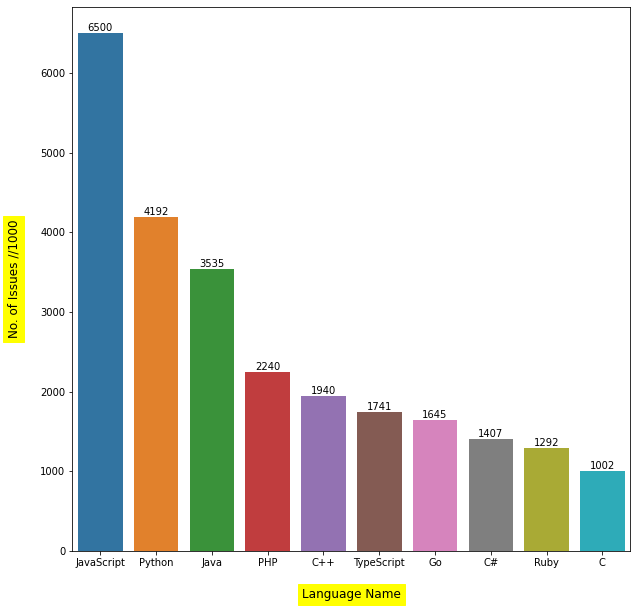

In [9]:
#Absolute Value trends for overall case
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'name', y = 'count//1000',data = df)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Issues //1000', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

In [12]:
# Checking to see if there was a sudden rise in popularity of any one language (only considering 5 every year here to not make it too complicated)
merged = pd.DataFrame() 
for i in [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]:
    rr = pd.DataFrame(issues[issues['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
    rr.reset_index(level=0, inplace=True)
    merged = pd.concat([merged,rr],axis = 'index')

In [13]:
# Year vs Count 
df_year = pd.DataFrame(issues.groupby('year')['count'].sum())
df_year.reset_index(level=0, inplace=True)
df_year.head()

,year,count
0,2011,26074
1,2012,483126
2,2013,1243638
3,2014,2385009
4,2015,4039150


In [14]:
# Absolute count and yearwise relative count( count for the language/total count for that year) have been mentioned for top 10 languages
df1 = pd.DataFrame(issues.groupby(['year','name'])['count'].sum())
df1.reset_index(level=[0,1], inplace=True)
lst = ['JavaScript','Java','Python','C++','PHP','Go','TypeScript','C#','Ruby','C']
total = []
for i in range(len(df_year['year'])):
    for j in df1.loc[df1['year']== df_year.loc[i,'year']]['count']:
        total.append(j/df_year.loc[i,'count'])
df1['total'] = total
df2 = df1.loc[df1['name'].isin(lst)]

df2.head(10)

,year,name,count,total
1,2011,C,1276,0.048938
2,2011,C#,888,0.034057
3,2011,C++,2280,0.087443
10,2011,Java,2228,0.085449
11,2011,JavaScript,4697,0.180141
13,2011,PHP,3401,0.130436
14,2011,Python,3764,0.144358
15,2011,Ruby,5326,0.204265
23,2012,C,16423,0.033993
24,2012,C#,12657,0.026198


Text(0.5, 0, 'Year')

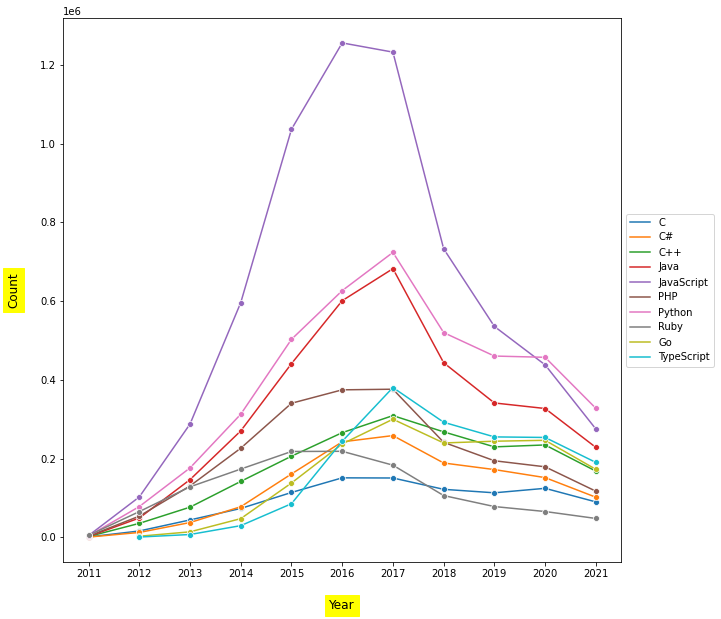

In [15]:
# Absolute value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'count', hue = 'name',data = df2,marker = 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

Text(0.5, 0, 'Language Name')

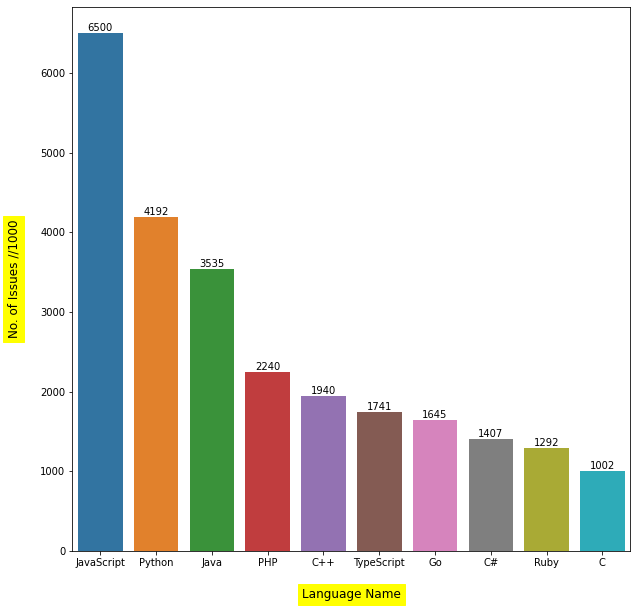

In [16]:
#Absolute Value trends for overall case
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'name', y = 'count//1000',data = df)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Issues //1000', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

Text(0.5, 0, 'Year')

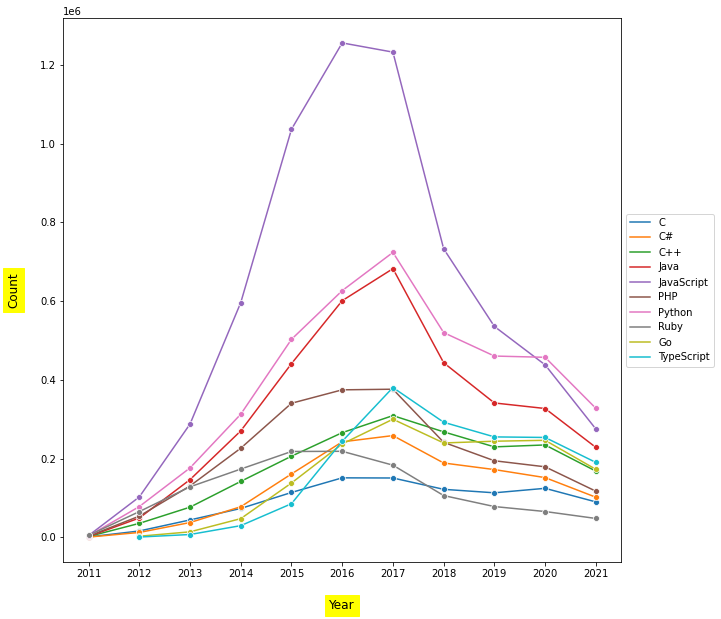

In [17]:
# Absolute value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'count', hue = 'name',data = df2,marker = 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

Text(0.5, 0, 'Year')

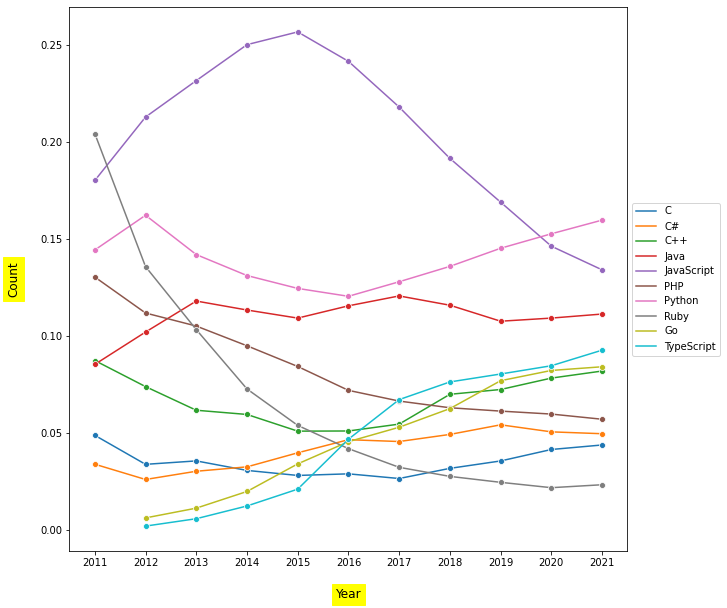

In [18]:
# Relative value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'total', hue = 'name',data = df2,marker = 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

# Pull Requests Data Visualization and Analysis

In [19]:
# Languages vs Pull Requests data
df3 = pd.DataFrame(prs.groupby('name')['count'].sum().nlargest(10))
df3.reset_index(level=0, inplace=True)
df3['count//1000'] = df3['count']//1000
df3

,name,count,count//1000
0,JavaScript,7510950,7510
1,Python,5903485,5903
2,Java,3731104,3731
3,Ruby,2887084,2887
4,PHP,2474293,2474
5,Go,2401696,2401
6,C++,2145571,2145
7,TypeScript,1993488,1993
8,C#,1181601,1181
9,HTML,1180146,1180


In [20]:
#Year vs Pull Requests count data
df_year_1 = pd.DataFrame(prs.groupby('year')['count'].sum())
df_year_1.reset_index(level=0, inplace=True)
df_year_1.head()

,year,count
0,2011,15528
1,2012,430350
2,2013,952269
3,2014,2048373
4,2015,4112878


In [21]:
# Checking to see if there was a sudden rise in popularity of any one language (only considering 5 every year here to not make it too complicated)
merged = pd.DataFrame() 
for i in [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]:
    rr = pd.DataFrame(issues[prs['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
    rr.reset_index(level=0, inplace=True)
    merged = pd.concat([merged,rr],axis = 'index')
#merged (commented out to improve readability)

<ipython-input-21-48858f5fe984>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rr = pd.DataFrame(issues[prs['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
<ipython-input-21-48858f5fe984>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rr = pd.DataFrame(issues[prs['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
<ipython-input-21-48858f5fe984>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rr = pd.DataFrame(issues[prs['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
<ipython-input-21-48858f5fe984>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rr = pd.DataFrame(issues[prs['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
<ipython-input-21-48858f5fe984>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rr = pd.DataFrame(issues[prs['year']== i].groupby(['nam

In [22]:
# Absolute count and yearwise relative count( count for the language/total count for that year) have been mentioned for top 10 languages
df4 = pd.DataFrame(prs.groupby(['year','name'])['count'].sum())
df4.reset_index(level=[0,1], inplace=True)
lst1 = ['JavaScript','Java','Python','Ruby','PHP','Go','C++','TypeScript','C#','HTML']
total = []
for i in range(len(df_year['year'])):
    for j in df4.loc[df4['year']== df_year_1.loc[i,'year']]['count']:
        total.append(j/df_year_1.loc[i,'count'])
df4['total'] = total
df5 = df4.loc[df4['name'].isin(lst1)]
df5.head(10)

,year,name,count,total
1,2011,C#,291,0.018740
2,2011,C++,1012,0.065173
4,2011,HTML,149,0.009596
6,2011,Java,1200,0.077280
7,2011,JavaScript,2184,0.140649
9,2011,PHP,2745,0.176777
10,2011,Python,2543,0.163769
11,2011,Ruby,3679,0.236927
15,2012,C#,7650,0.017776
16,2012,C++,20120,0.046753


Text(0.5, 0, 'Language Name')

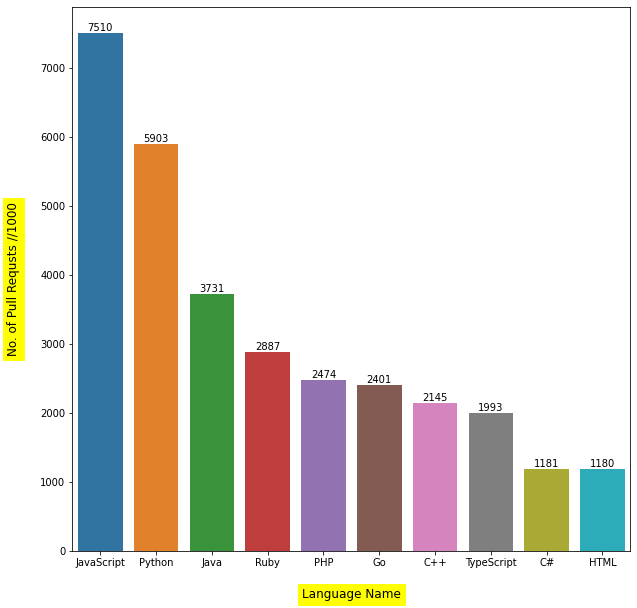

In [23]:
# Absolute value trends overall
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'name', y = 'count//1000',data = df3)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Pull Requsts //1000', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

Text(0.5, 0, 'Year')

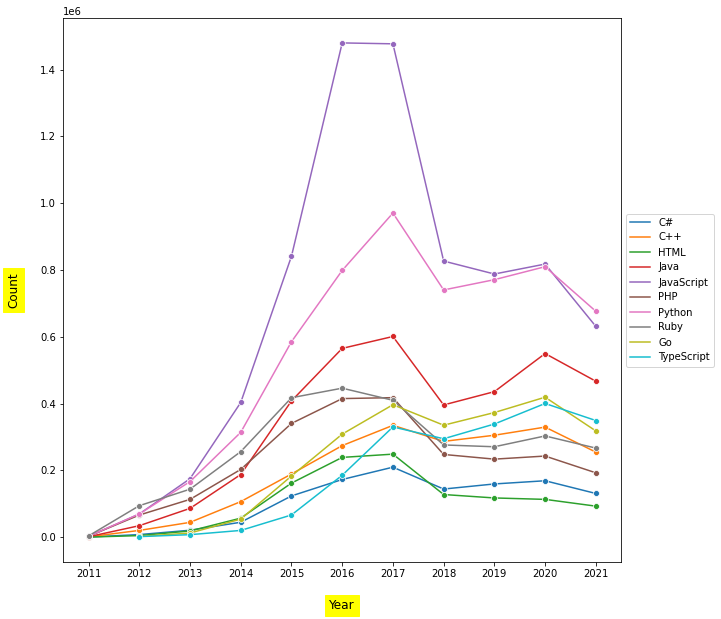

In [24]:
# Absolute value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'count', hue = 'name',data = df5,marker= 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

Text(0.5, 0, 'Year')

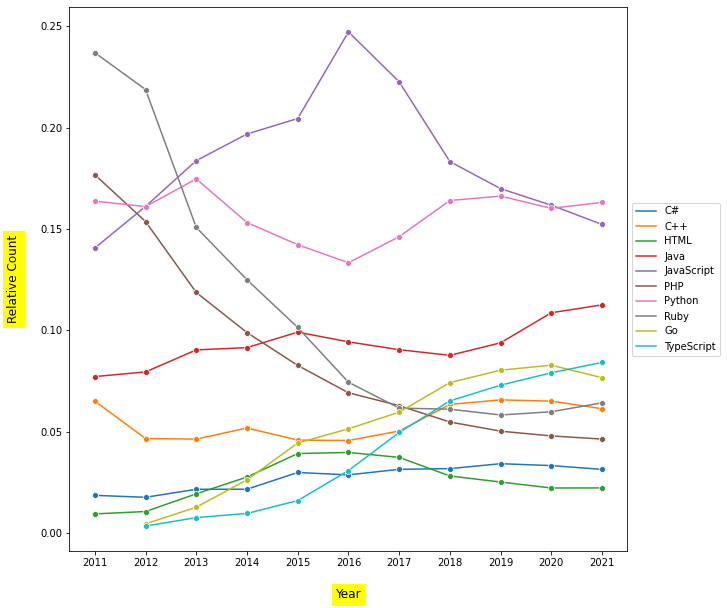

In [25]:
# Relative value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'total', hue = 'name',data = df5,marker = 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Relative Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

# Public Repositories Data Visualization and Analysis

In [26]:
df9 = pd.DataFrame(repos.head(10))
df9['num_repos//1000'] = df9['num_repos']//1000
df9

,language,num_repos,num_repos//1000
0,JavaScript,1100421,1100
1,CSS,813443,813
2,HTML,779549,779
3,Shell,638068,638
4,Python,548870,548
5,Ruby,374802,374
6,Java,369282,369
7,PHP,339901,339
8,C,292000,292
9,C++,278066,278


Text(0.5, 0, 'Language Name')

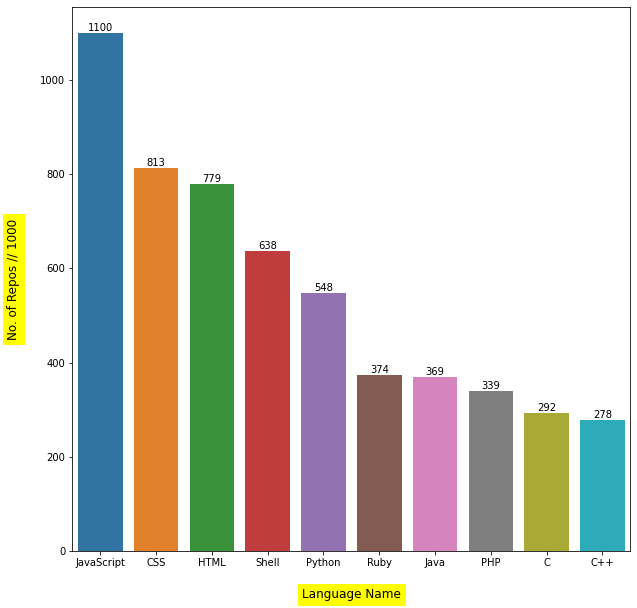

In [27]:
# Absolute Value trend overall
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'language', y = 'num_repos//1000',data = df9)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Repos // 1000', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)